# step 1: Importing Libraries                                                                                                 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the data

In [2]:
train=pd.read_csv('sample_train.csv')

In [3]:
train.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
Unnamed: 0           200000 non-null int64
key                  200000 non-null object
fare_amount          200000 non-null float64
pickup_datetime      200000 non-null object
pickup_longitude     200000 non-null float64
pickup_latitude      200000 non-null float64
dropoff_longitude    199999 non-null float64
dropoff_latitude     199999 non-null float64
passenger_count      200000 non-null int64
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
train.corr()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,0.000589,0.000230,-0.000341,0.000270,0.000271,0.002257
fare_amount,0.000589,1.000000,0.010457,-0.008481,0.008986,-0.011014,0.010150
pickup_longitude,0.000230,0.010457,1.000000,-0.816461,0.833026,-0.846324,-0.000414
pickup_latitude,-0.000341,-0.008481,-0.816461,1.000000,-0.774787,0.702367,-0.001560
dropoff_longitude,0.000270,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,0.000271,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.002257,0.010150,-0.000414,-0.001560,0.000033,-0.000659,1.000000


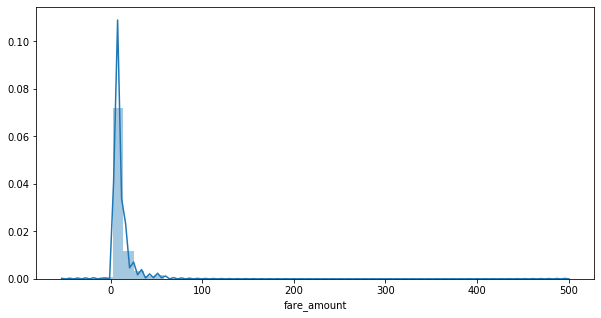

In [6]:
plt.figure(figsize=(10,5))
sns.distplot(train['fare_amount'])
plt.show()

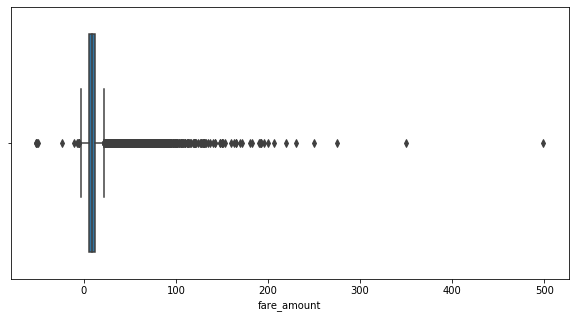

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(train['fare_amount'])
plt.show()

In [8]:
test=pd.read_excel('sample_test_without_target.xlsx')

In [9]:
test.head()

,Unnamed: 0,Unnamed: 0.1,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,37338,31401407,2011-02-10 19:06:00,2011-02-10 19:06:00 UTC,-73.951662,40.790710,-73.947570,40.756220,1
1,160901,33158465,2011-06-23 09:24:00,2011-06-23 09:24:00 UTC,-73.951007,40.771508,-73.974075,40.763553,1
2,40428,10638355,2012-07-14 10:37:00,2012-07-14 10:37:00 UTC,-73.996473,40.747930,-73.990298,40.756152,6
3,63353,3836845,2014-10-19 22:27:05,2014-10-19 22:27:05 UTC,-73.997934,40.716890,-73.952617,40.727149,1
4,165491,27114503,2015-05-25 22:54:43,2015-05-25 22:54:43 UTC,-73.952583,40.714039,-73.906128,40.711281,1


- Removing the Columns unnamed,Key, pickup_datetime from the train and tests datasets

In [10]:
train.drop(['Unnamed: 0','key','pickup_datetime'],axis=1,inplace=True)

In [11]:
test.drop(['Unnamed: 0','Unnamed: 0.1','key','pickup_datetime'],axis=1,inplace=True)

In [12]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5


In [13]:
test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.951662,40.790710,-73.947570,40.756220,1
1,-73.951007,40.771508,-73.974075,40.763553,1
2,-73.996473,40.747930,-73.990298,40.756152,6
3,-73.997934,40.716890,-73.952617,40.727149,1
4,-73.952583,40.714039,-73.906128,40.711281,1


# Step3 Exprloratory Data Analysis

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
fare_amount          200000 non-null float64
pickup_longitude     200000 non-null float64
pickup_latitude      200000 non-null float64
dropoff_longitude    199999 non-null float64
dropoff_latitude     199999 non-null float64
passenger_count      200000 non-null int64
dtypes: float64(5), int64(1)
memory usage: 9.2 MB


### HAndling missing values for train dataset

In [15]:
train.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

- From the above we see that dropoff_longitude and dropoff_lattude are consisting two missing values.

In [16]:
train['dropoff_longitude'].describe()

count    199999.000000
mean        -72.525292
std          13.117408
min       -3356.666300
25%         -73.991407
50%         -73.980093
75%         -73.963658
max        1153.572603
Name: dropoff_longitude, dtype: float64

- From the we can see that mean and median are nearly same so we are substituting mean in the missing values

In [17]:
train['dropoff_longitude']=train['dropoff_longitude'].fillna(train['dropoff_longitude'].mean())

In [18]:
train['dropoff_latitude'].describe()

count    199999.000000
mean         39.923890
std           6.794829
min        -881.985513
25%          40.733823
50%          40.753042
75%          40.768001
max         872.697628
Name: dropoff_latitude, dtype: float64

- From the we can see that mean and median are nearly same so we are substituting mean in the missing values

In [19]:
train['dropoff_latitude']=train['dropoff_latitude'].fillna(train['dropoff_latitude'].mean())

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
fare_amount          200000 non-null float64
pickup_longitude     200000 non-null float64
pickup_latitude      200000 non-null float64
dropoff_longitude    200000 non-null float64
dropoff_latitude     200000 non-null float64
passenger_count      200000 non-null int64
dtypes: float64(5), int64(1)
memory usage: 9.2 MB


In [21]:
train.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.010457,-0.008481,0.008986,-0.011014,0.010150
pickup_longitude,0.010457,1.000000,-0.816461,0.833026,-0.846324,-0.000414
pickup_latitude,-0.008481,-0.816461,1.000000,-0.774787,0.702367,-0.001560
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.010150,-0.000414,-0.001560,0.000033,-0.000659,1.000000


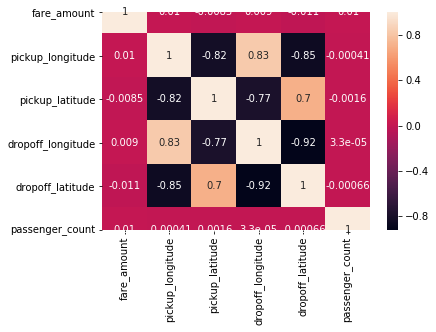

In [22]:
corr=train.corr()
sns.heatmap(corr,annot=True)
plt.show()

### Handling missing values for test dataset

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
pickup_longitude     50000 non-null float64
pickup_latitude      50000 non-null float64
dropoff_longitude    50000 non-null float64
dropoff_latitude     50000 non-null float64
passenger_count      50000 non-null int64
dtypes: float64(4), int64(1)
memory usage: 1.9 MB


In [24]:
test.isnull().sum()

pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

- From above we can see that there are no null values present in test dataset

- It is observed that the datasets doesn't have any categorical cloumns

# Training and building classifier

In [25]:
train.keys()

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [26]:
X=train.drop('fare_amount',axis=1)
y=train['fare_amount']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160000, 5), (40000, 5), (160000,), (40000,))

# Performing Linear Regression

### Performing linear Regression on Training data

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr=LinearRegression()

In [32]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting the output using fitted model:

In [33]:
y_lr_predict=lr.predict(X_test)

### Calculating MSE and RMSE for Linear Regression model for this dataset

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
Lr_mse=mean_squared_error(y_test,y_lr_predict)

In [36]:
print('Mean sqaured error for Linear regression:')
print(Lr_mse)

Mean sqaured error for Linear regression:
104.8078796080695


In [37]:
import math

In [38]:
Lr_Rmse=math.sqrt(Lr_mse)

In [39]:
print('Rmse for Linear Regression:')
print(Lr_Rmse)

Rmse for Linear Regression:
10.237571958627177


# Decision Tree Regression

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
DTR=DecisionTreeRegressor()

In [42]:
DTR.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [43]:
y_DTR_predict=DTR.predict(X_test)

### Finding mean squared error for DTR

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
DTR_mse=mean_squared_error(y_test,y_DTR_predict)

In [46]:
print('Mean squared error using DTR :')
print(DTR_mse)

Mean squared error using DTR :
52.213606769447


In [47]:
DTR_Rmse=math.sqrt(DTR_mse)

In [48]:
print('Rmse using DTR:')
print(DTR_Rmse)

Rmse using DTR:
7.225898336500936


# Random Forest Regression

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
RFR=RandomForestRegressor()

In [51]:
RFR.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [52]:
y_RFR_predict=RFR.predict(X_test)

In [53]:
RFR_mse=mean_squared_error(y_test,y_RFR_predict)

In [54]:
print('MSE using RFR:')
print(RFR_mse)

MSE using RFR:
29.406274638137855


In [55]:
RFR_Rmse=math.sqrt(RFR_mse)

In [56]:
print('Rmse using RFR:')
print(RFR_Rmse)

Rmse using RFR:
5.422755262607548


## Observations:

- From the above three Regression models the Rmse values were observed lesser using Random Forest Regression followed by Decision tree Regression followed by Linear Regression.
- It is observed that Random Forest Regression is better compared to the other regression models

### Final predictions on TEST data usinf Random Forest Regression Model

In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
pickup_longitude     50000 non-null float64
pickup_latitude      50000 non-null float64
dropoff_longitude    50000 non-null float64
dropoff_latitude     50000 non-null float64
passenger_count      50000 non-null int64
dtypes: float64(4), int64(1)
memory usage: 1.9 MB


In [58]:
test_pred=RFR.predict(test)

In [59]:
test['RFR_Fare_predictions']=test_pred

In [60]:
test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,RFR_Fare_predictions
0,-73.951662,40.790710,-73.947570,40.756220,1,11.88
1,-73.951007,40.771508,-73.974075,40.763553,1,9.78
2,-73.996473,40.747930,-73.990298,40.756152,6,5.17
3,-73.997934,40.716890,-73.952617,40.727149,1,12.51
4,-73.952583,40.714039,-73.906128,40.711281,1,9.88


In [61]:
test.to_csv('Final_uber_predictions1.csv')